# Multiple Linear Regression
## Bike Sharing Demand

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Step 1: Reading and understanding the data

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data

bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikesharing.shape

(730, 16)

In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Converting datetime to pandas datetime format

bikesharing['dteday'] = pd.to_datetime(bikesharing['dteday'], format='mixed', infer_datetime_format=True)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Step 2: Visualsing the data

<Figure size 2000x1200 with 0 Axes>

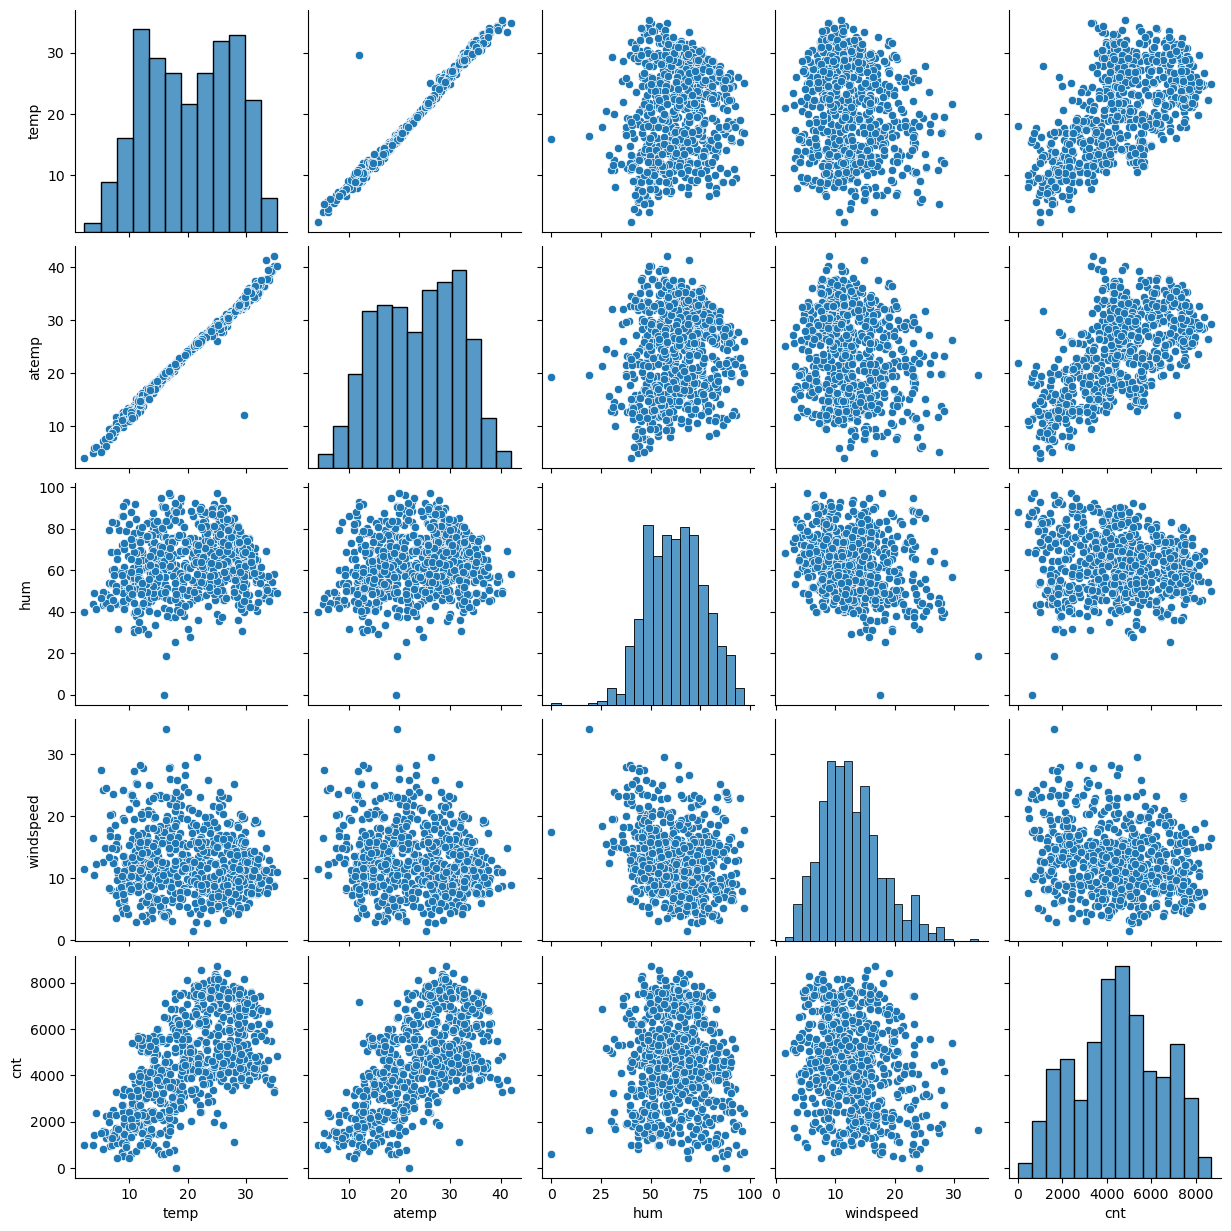

In [8]:
# Visualzing the data on numerical columns

plt.figure(figsize = (20,12))
sns.pairplot(data = bikesharing, palette='husl', vars=["temp","atemp","hum","windspeed","cnt"])     
plt.show()    

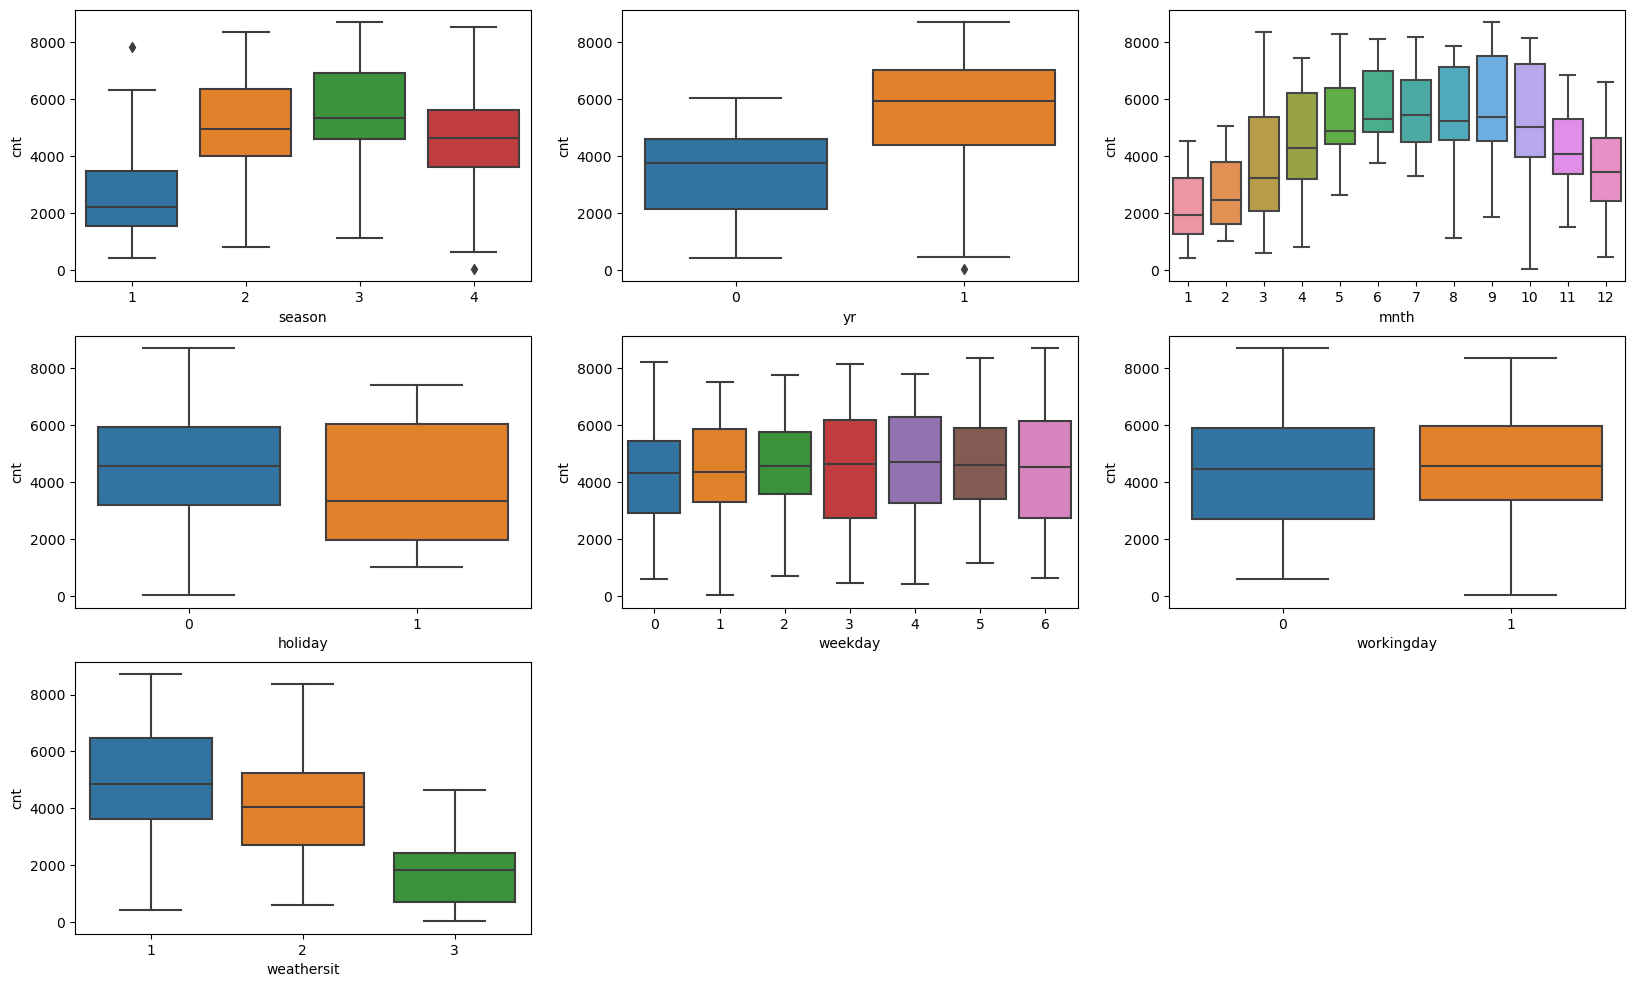

In [9]:
# Visualizing the data on catergorical columns

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

## From above boxplot on catergorical values It's observed that bikes rented is high :

- During Season 2(Summer) and season 3(Fall)
- Bike rented percentage is high in 2nd year i.e 2019, befor starting covid
- During mid months i.e. month 4 to month 10(April to October)
- During Holidays(0)
- Bikes rented during weekdays and working days remains almost same on all days.
- During weathersit 1(clear, Few clouds, partly coludy)

##  Step 3: Preparing the data for model

- As we can see there is no yes or no columns in data, but we have season and weather mist with labels, which needs to convert into catergorical variables

In [10]:
# Removing "dteday","instant" variable
bikesharing.drop(['dteday','instant','casual','registered'],  axis = 1, inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy variables

In [11]:
# Creating dummy variables for season,Let's drop the first column from status df using 'drop_first = True'

season = pd.get_dummies(bikesharing["season"], dtype = int, drop_first = True)
# season.head()

In [12]:
season = season.rename(columns = {2:'summer',3:'fall',4:'winter'})
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
# Add the results to the original BikeRental dataframe

bikesharing = pd.concat([bikesharing, season], axis = 1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [14]:
# Drop 'season' as we have created the dummies for it

bikesharing = bikesharing.drop('season', axis = 1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [15]:
# Creating dummy variables for Weathersit
weathersit = pd.get_dummies(bikesharing["weathersit"], dtype = int, drop_first = True)
weathersit.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [16]:
weathersit = weathersit.rename(columns = {2:'Mist',3:'snow'})
weathersit.head()

,Mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [17]:
bikesharing = pd.concat([bikesharing, weathersit], axis = 1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,snow
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [18]:
bikesharing = bikesharing.drop('weathersit', axis = 1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,snow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [19]:
# Creating dummy variables for 'mnth'
import calendar
bikesharing['mnth'] = bikesharing['mnth'].apply(lambda x: calendar.month_abbr[x])

In [20]:
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Mist,snow
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [21]:
month = pd.get_dummies(bikesharing["mnth"], dtype = int, drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
bikesharing = pd.concat([bikesharing, month], axis = 1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [23]:
bikesharing = bikesharing.drop('mnth', axis = 1)
bikesharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# Creating dummy variables for 'mnth'
bikesharing.weekday = bikesharing.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [25]:
weekday = pd.get_dummies(bikesharing["weekday"], dtype = int, drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [26]:
bikesharing = pd.concat([bikesharing, weekday], axis = 1)
bikesharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
bikesharing = bikesharing.drop('weekday', axis = 1)
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
bikesharing.shape

(730, 30)

## Step 4: Splitting into train-test data

In [29]:
# Splitting into train_test_data

df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Variables

In [30]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create the list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


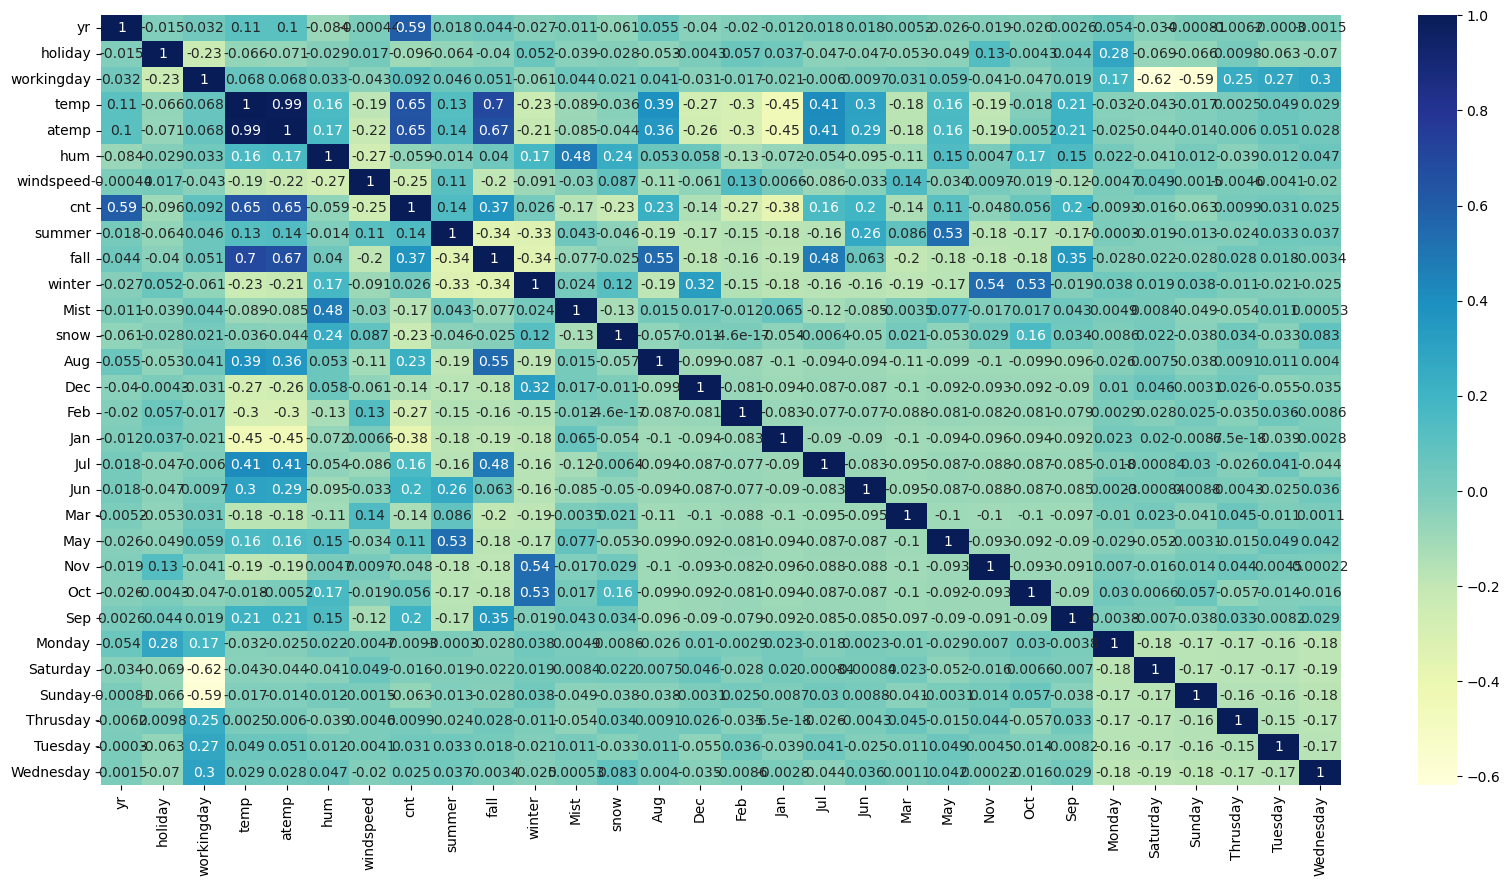

In [32]:
# Heatmap
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing X and Y stes to build the model

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6 : Builiding the Linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [34]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mist', True, 1),
 ('snow', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 8),
 ('Nov', False, 4),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', False, 10),
 ('Thrusday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14)]

### Starting with all the columns selected by RFE

### Model 1

In [36]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Mist', 'snow', 'Jul', 'Sep', 'Saturday'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Monday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         510 non-null    int64  
 1   holiday    510 non-null    int64  
 2   temp       510 non-null    float64
 3   hum        510 non-null    float64
 4   windspeed  510 non-null    float64
 5   summer     510 non-null    int32  
 6   fall       510 non-null    int32  
 7   winter     510 non-null    int32  
 8   Mist       510 non-null    int32  
 9   snow       510 non-null    int32  
 10  Jul        510 non-null    int32  
 11  Sep        510 non-null    int32  
 12  Saturday   510 non-null    int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 39.8 KB


In [40]:
# Add a constand

X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model

lr = sm.OLS(y_train,X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const        0.223860
yr           0.229800
holiday     -0.093935
temp         0.530449
hum         -0.169705
windspeed   -0.183413
summer       0.109665
fall         0.056416
winter       0.153645
Mist        -0.053198
snow        -0.238105
Jul         -0.057558
Sep          0.082971
Saturday     0.017480
dtype: float64

In [42]:
# Let's visualise the data with a scatter plot and the fitted regression line
# plt.scatter(X_train_lm.iloc[:, 1], y_train)
# plt.plot(X_train_lm.iloc[:, 1], 0.024 + 0.933*X_train_lm.iloc[:, 1], 'r')
# plt.show()

In [43]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.31e-189
Time:                        20:39:50   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.027      8.309      0.0

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.48
3,hum,15.32
6,fall,7.16
4,windspeed,3.69
5,summer,3.42
7,winter,2.49
8,Mist,2.13
0,yr,2.03
10,Jul,1.61
11,Sep,1.41


### Model 2

In [45]:
# Dropping 'weekday_saturday', since it's p-value is high
X_train_new = X_train_rfe.drop(["Saturday"], axis = 1)

In [46]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const        0.228383
yr           0.229357
holiday     -0.096878
temp         0.529863
hum         -0.172595
windspeed   -0.182190
summer       0.109450
fall         0.056371
winter       0.153982
Mist        -0.052653
snow        -0.236920
Jul         -0.057247
Sep          0.083251
dtype: float64

In [47]:
# Check the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.95e-190
Time:                        20:39:50   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2284      0.027      8.513      0.0

In [48]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.47
3,hum,15.27
6,fall,7.16
4,windspeed,3.64
5,summer,3.42
7,winter,2.49
8,Mist,2.13
0,yr,2.03
10,Jul,1.61
11,Sep,1.41


### Model 3

In [49]:
# Dropping 'fall', sice it's VIF is high
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [50]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const        0.132265
yr           0.233570
holiday     -0.097463
temp         0.490988
windspeed   -0.147919
summer       0.113656
fall         0.067169
winter       0.148910
Mist        -0.080167
snow        -0.284199
Jul         -0.052057
Sep          0.076846
dtype: float64

In [51]:
# Check the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 26 May 2024   Prob (F-statistic):          5.06e-187
Time:                        20:39:50   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1323      0.017      7.791      0.0

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.40
5,fall,6.81
4,summer,3.37
3,windspeed,3.27
6,winter,2.41
0,yr,2.02
9,Jul,1.59
7,Mist,1.49
10,Sep,1.40
8,snow,1.08


### Model 4

In [53]:
# Dropping 'fall', sice it's VIF is high
X_train_new = X_train_new.drop(["fall"], axis = 1)

In [54]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const        0.121901
yr           0.232218
holiday     -0.099961
temp         0.569789
windspeed   -0.153953
summer       0.080296
winter       0.125222
Mist        -0.079417
snow        -0.281871
Jul         -0.040252
Sep          0.091927
dtype: float64

In [55]:
# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.52e-186
Time:                        20:39:50   Log-Likelihood:                 493.69
No. Observations:                 510   AIC:                            -965.4
Df Residuals:                     499   BIC:                            -918.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1219      0.017      7.251      0.0

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.06
3,windspeed,3.09
0,yr,2.01
4,summer,1.76
8,Jul,1.52
6,Mist,1.49
5,winter,1.45
9,Sep,1.29
7,snow,1.08
1,holiday,1.04


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_cnt = lr_4.predict(X_train_lm)

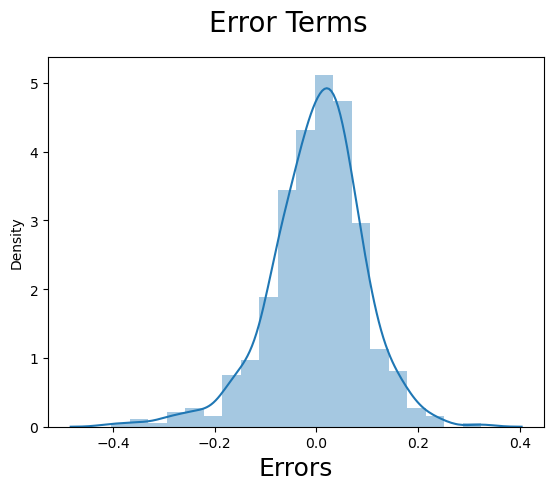

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms,  making predictions using the final, i.e. seventh model.

#### Applying the scaling on the test sets

In [59]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X-test and y-test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      220 non-null    float64
 1   yr         220 non-null    int64  
 2   holiday    220 non-null    int64  
 3   temp       220 non-null    float64
 4   windspeed  220 non-null    float64
 5   summer     220 non-null    int32  
 6   winter     220 non-null    int32  
 7   Mist       220 non-null    int32  
 8   snow       220 non-null    int32  
 9   Jul        220 non-null    int32  
 10  Sep        220 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 15.5 KB


In [63]:
# Making predictions using the fourth model

y_pred = lr_4.predict(X_test)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7935252416677806

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.00987244180613295

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

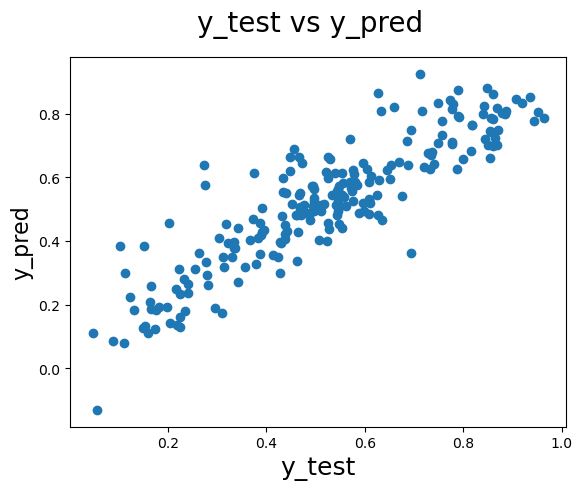

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [67]:
param = pd.DataFrame(lr_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.569789
1,yr,0.232218
6,winter,0.125222
0,const,0.121901
10,Sep,0.091927
5,summer,0.080296
9,Jul,-0.040252
7,Mist,-0.079417
2,holiday,-0.099961


We can see that the equation of our best fitted line is:

cnt = 0.121 + 0.567 X temp + 0.232 X yr + 0.125 X Season_Winter + 0.080 X season_ summer - 0.040 X mnth_Jul + 0.091 X mnth_Sep -0.287 X weathersit_Light Snow & Rain -0.079 X weathersit_Mist & Cloudy -0.099 X holiday -0.153 windspeed

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.